In [1]:
!pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


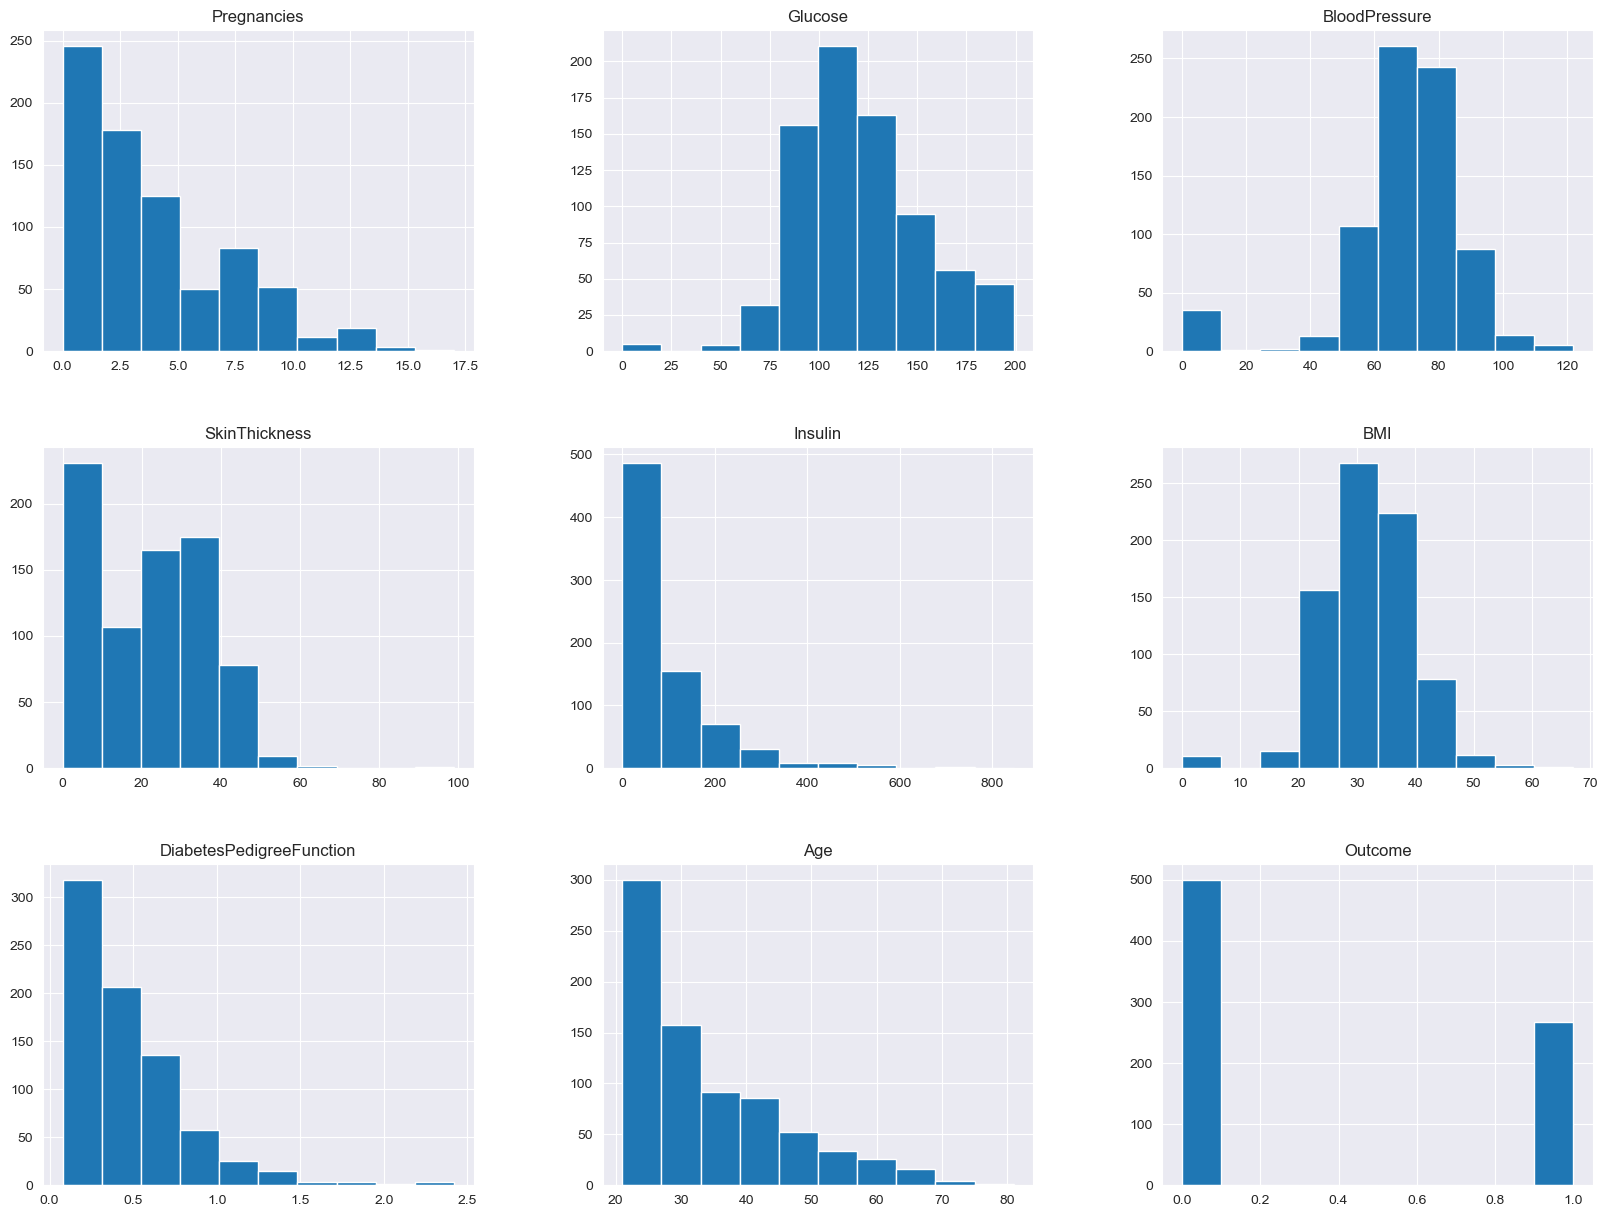

In [5]:
# Histograms
df.hist(bins=10, figsize=(20,15))
plt.show()

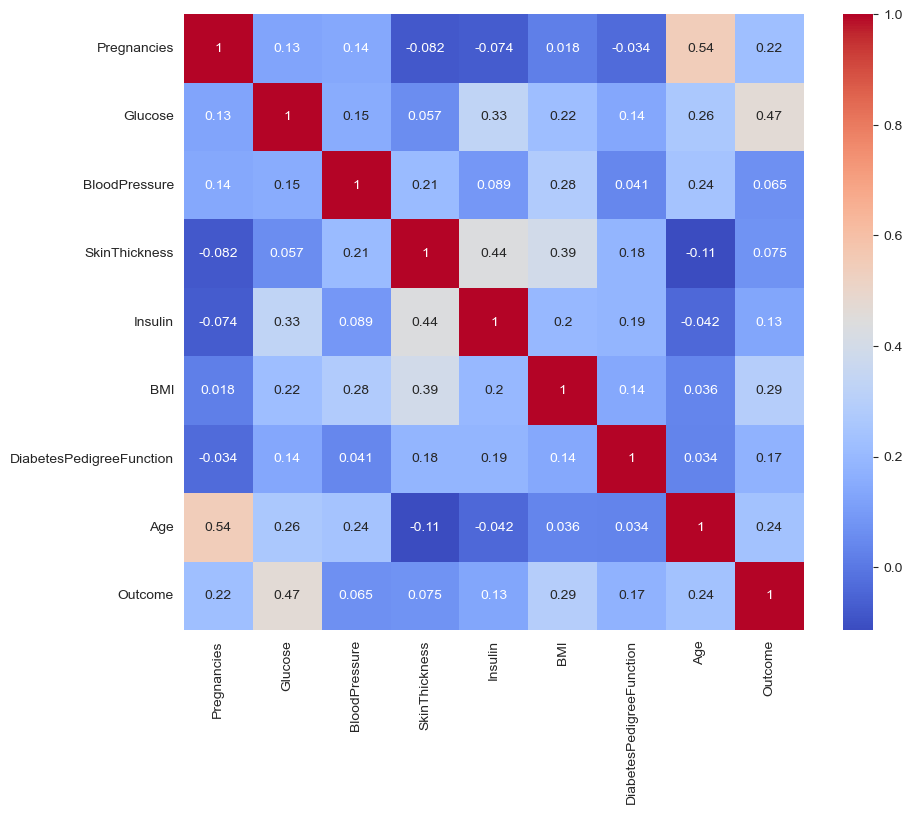

In [6]:
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

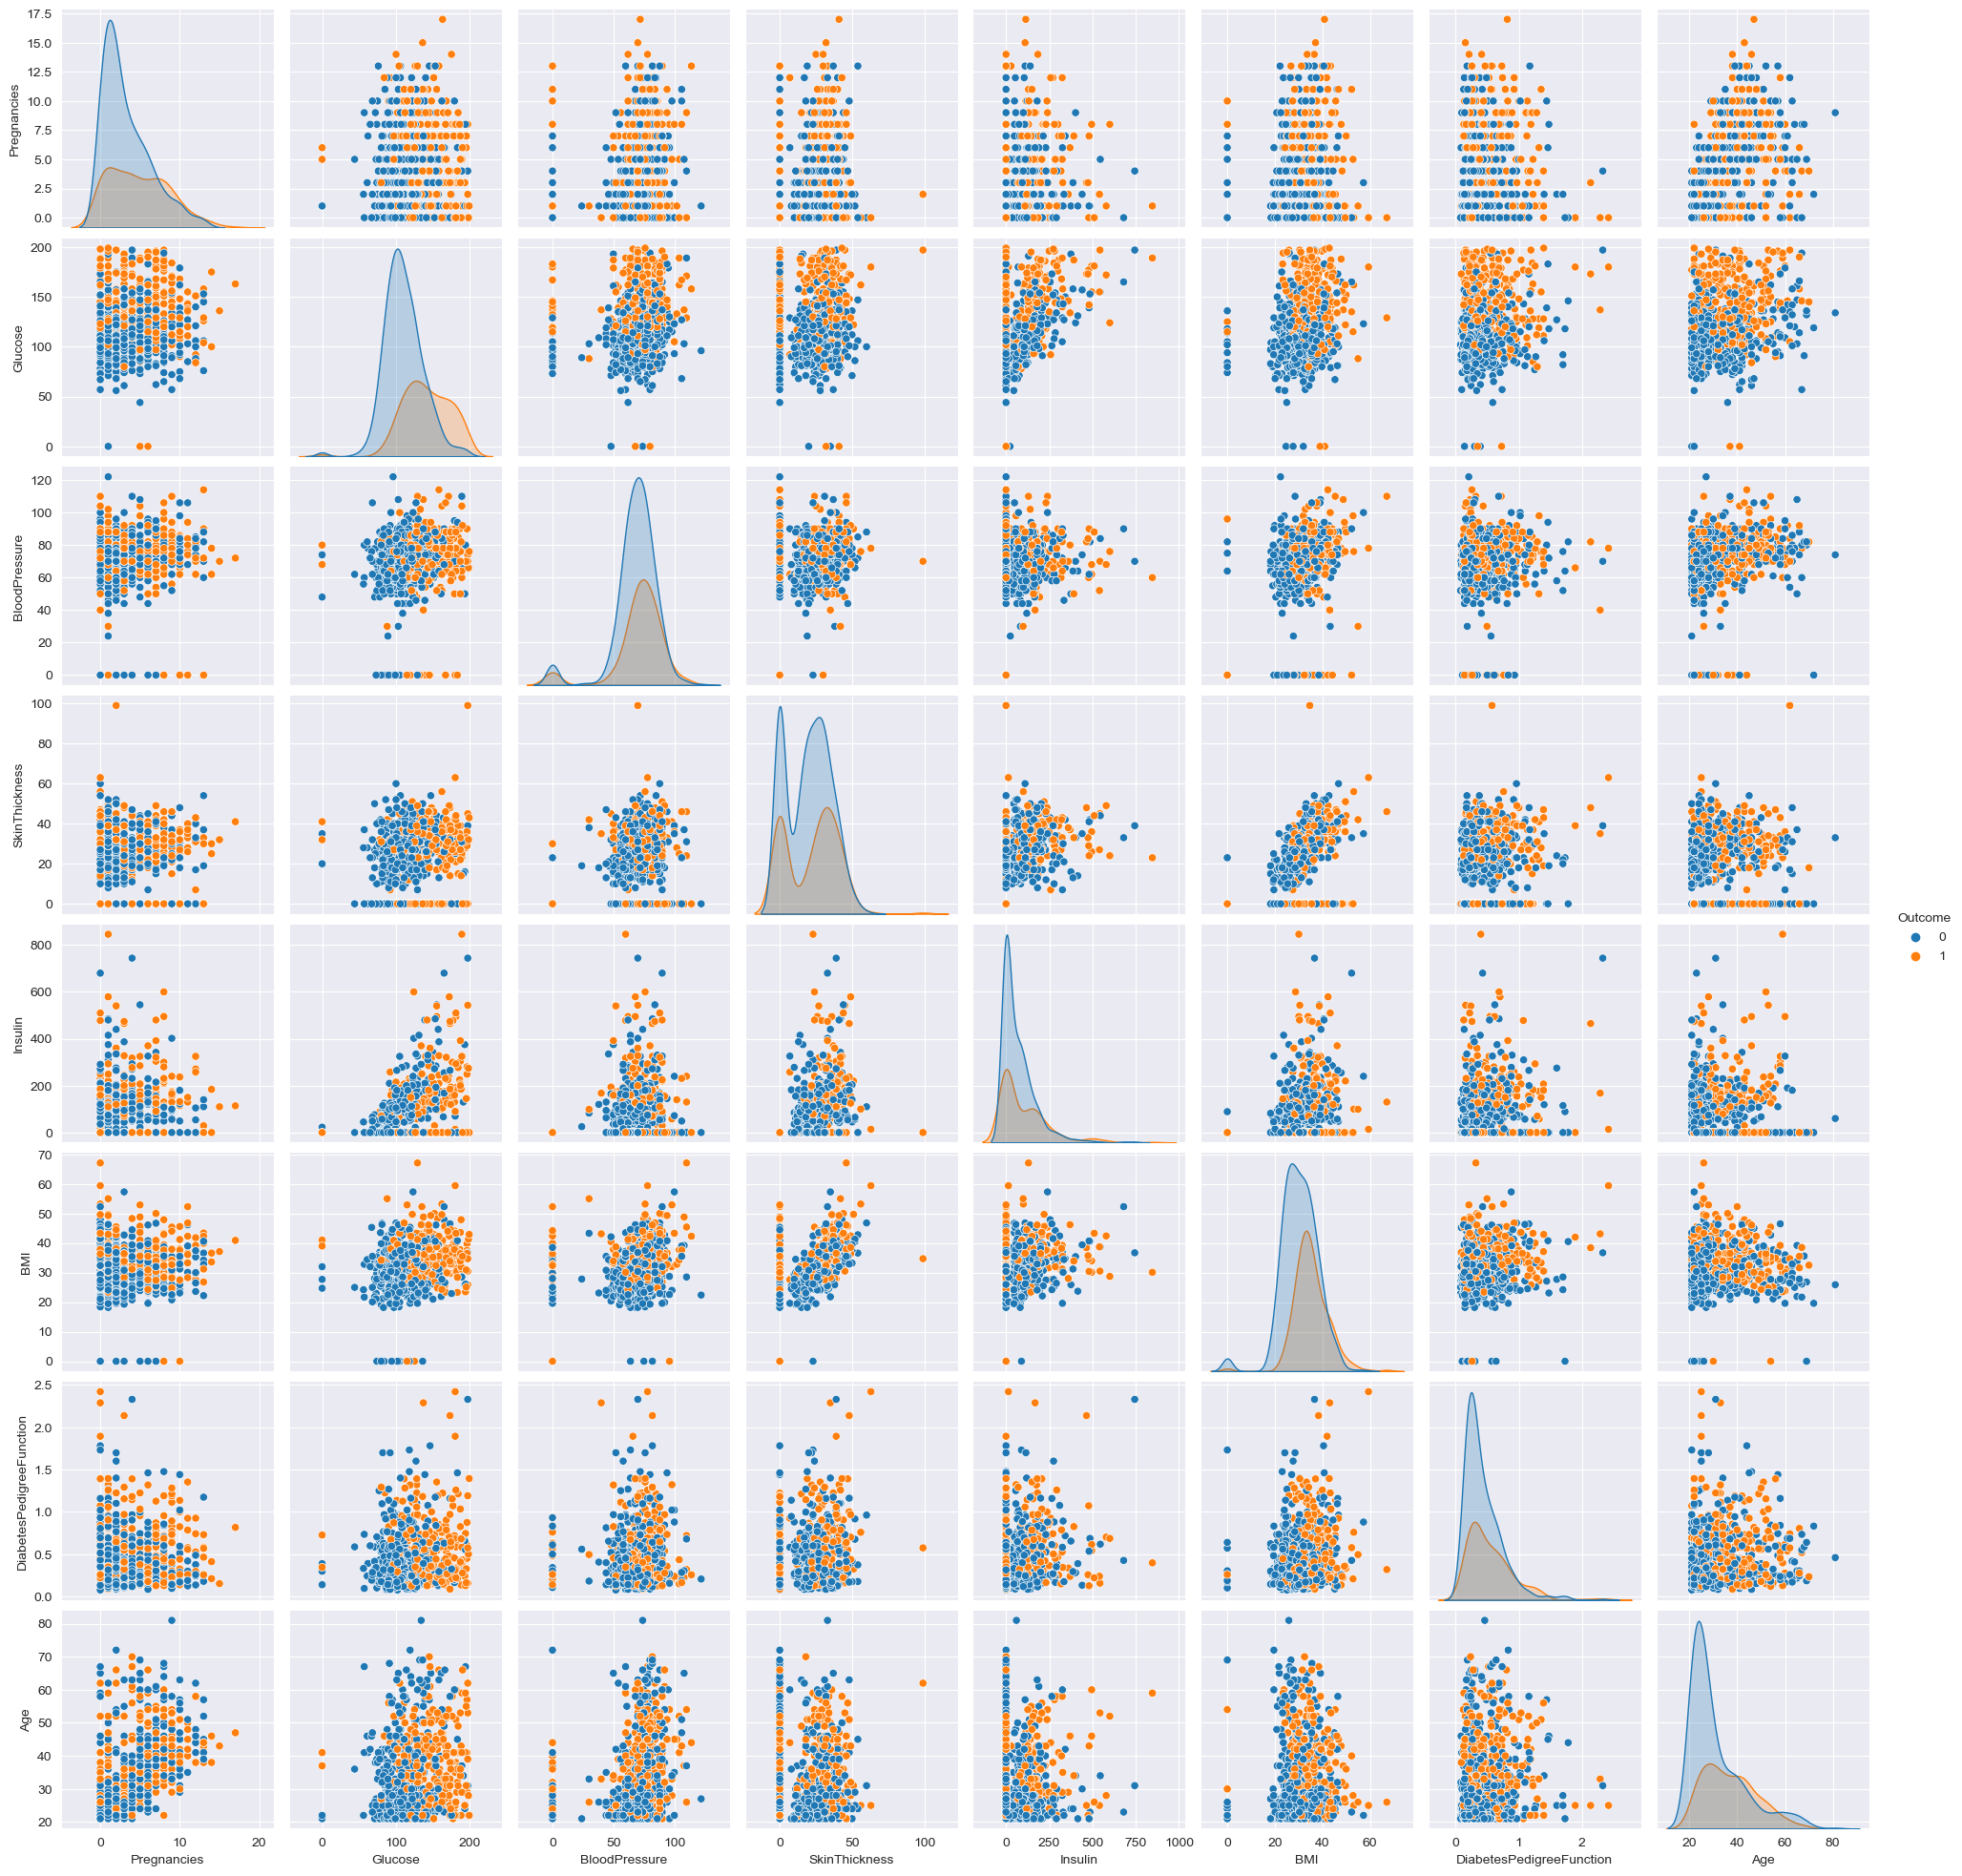

In [7]:
sns.pairplot(df, hue='Outcome')
plt.show()

In [8]:
suspicious_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [9]:
for col in suspicious_cols:
    print(col, ':', (df[col] == 0).sum())

Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11


In [10]:
for col in suspicious_cols:
    df[col] = df[col].replace(0, np.nan)

In [11]:
for col in suspicious_cols:
    df[col] = df[col].fillna(df[col].median())

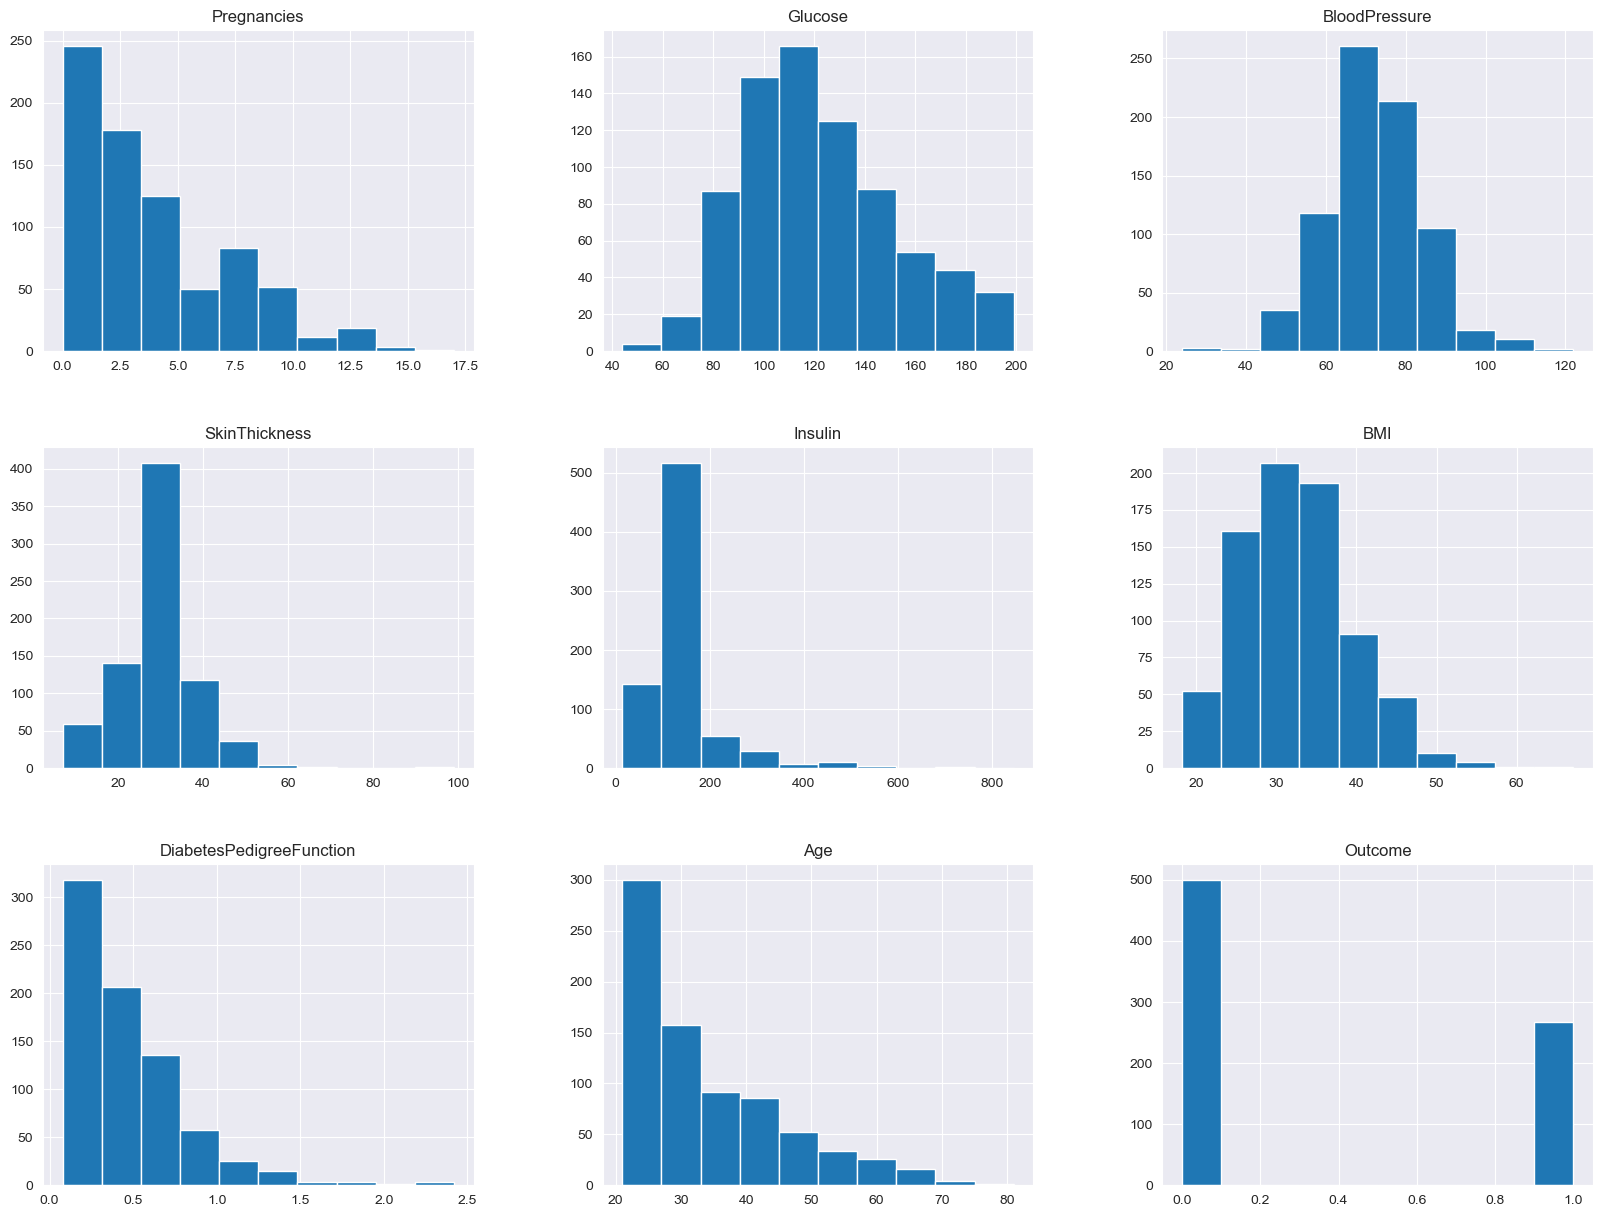

In [12]:
df.hist(bins=10, figsize=(20,15))
plt.show()

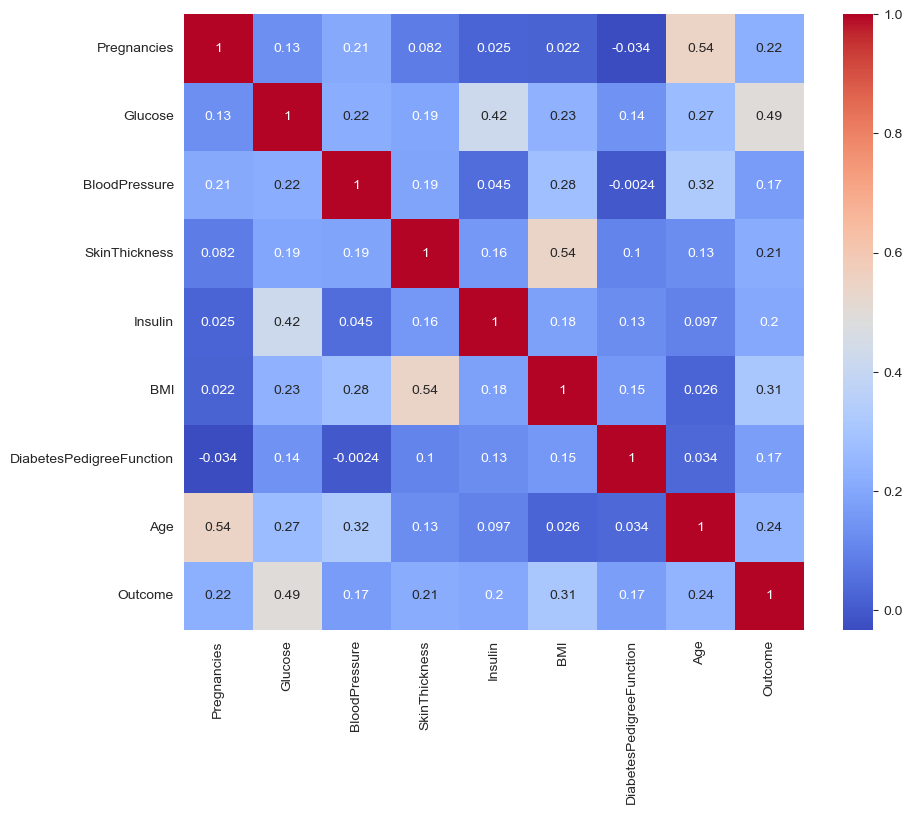

In [13]:
corr_matrix1 = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')
plt.show()

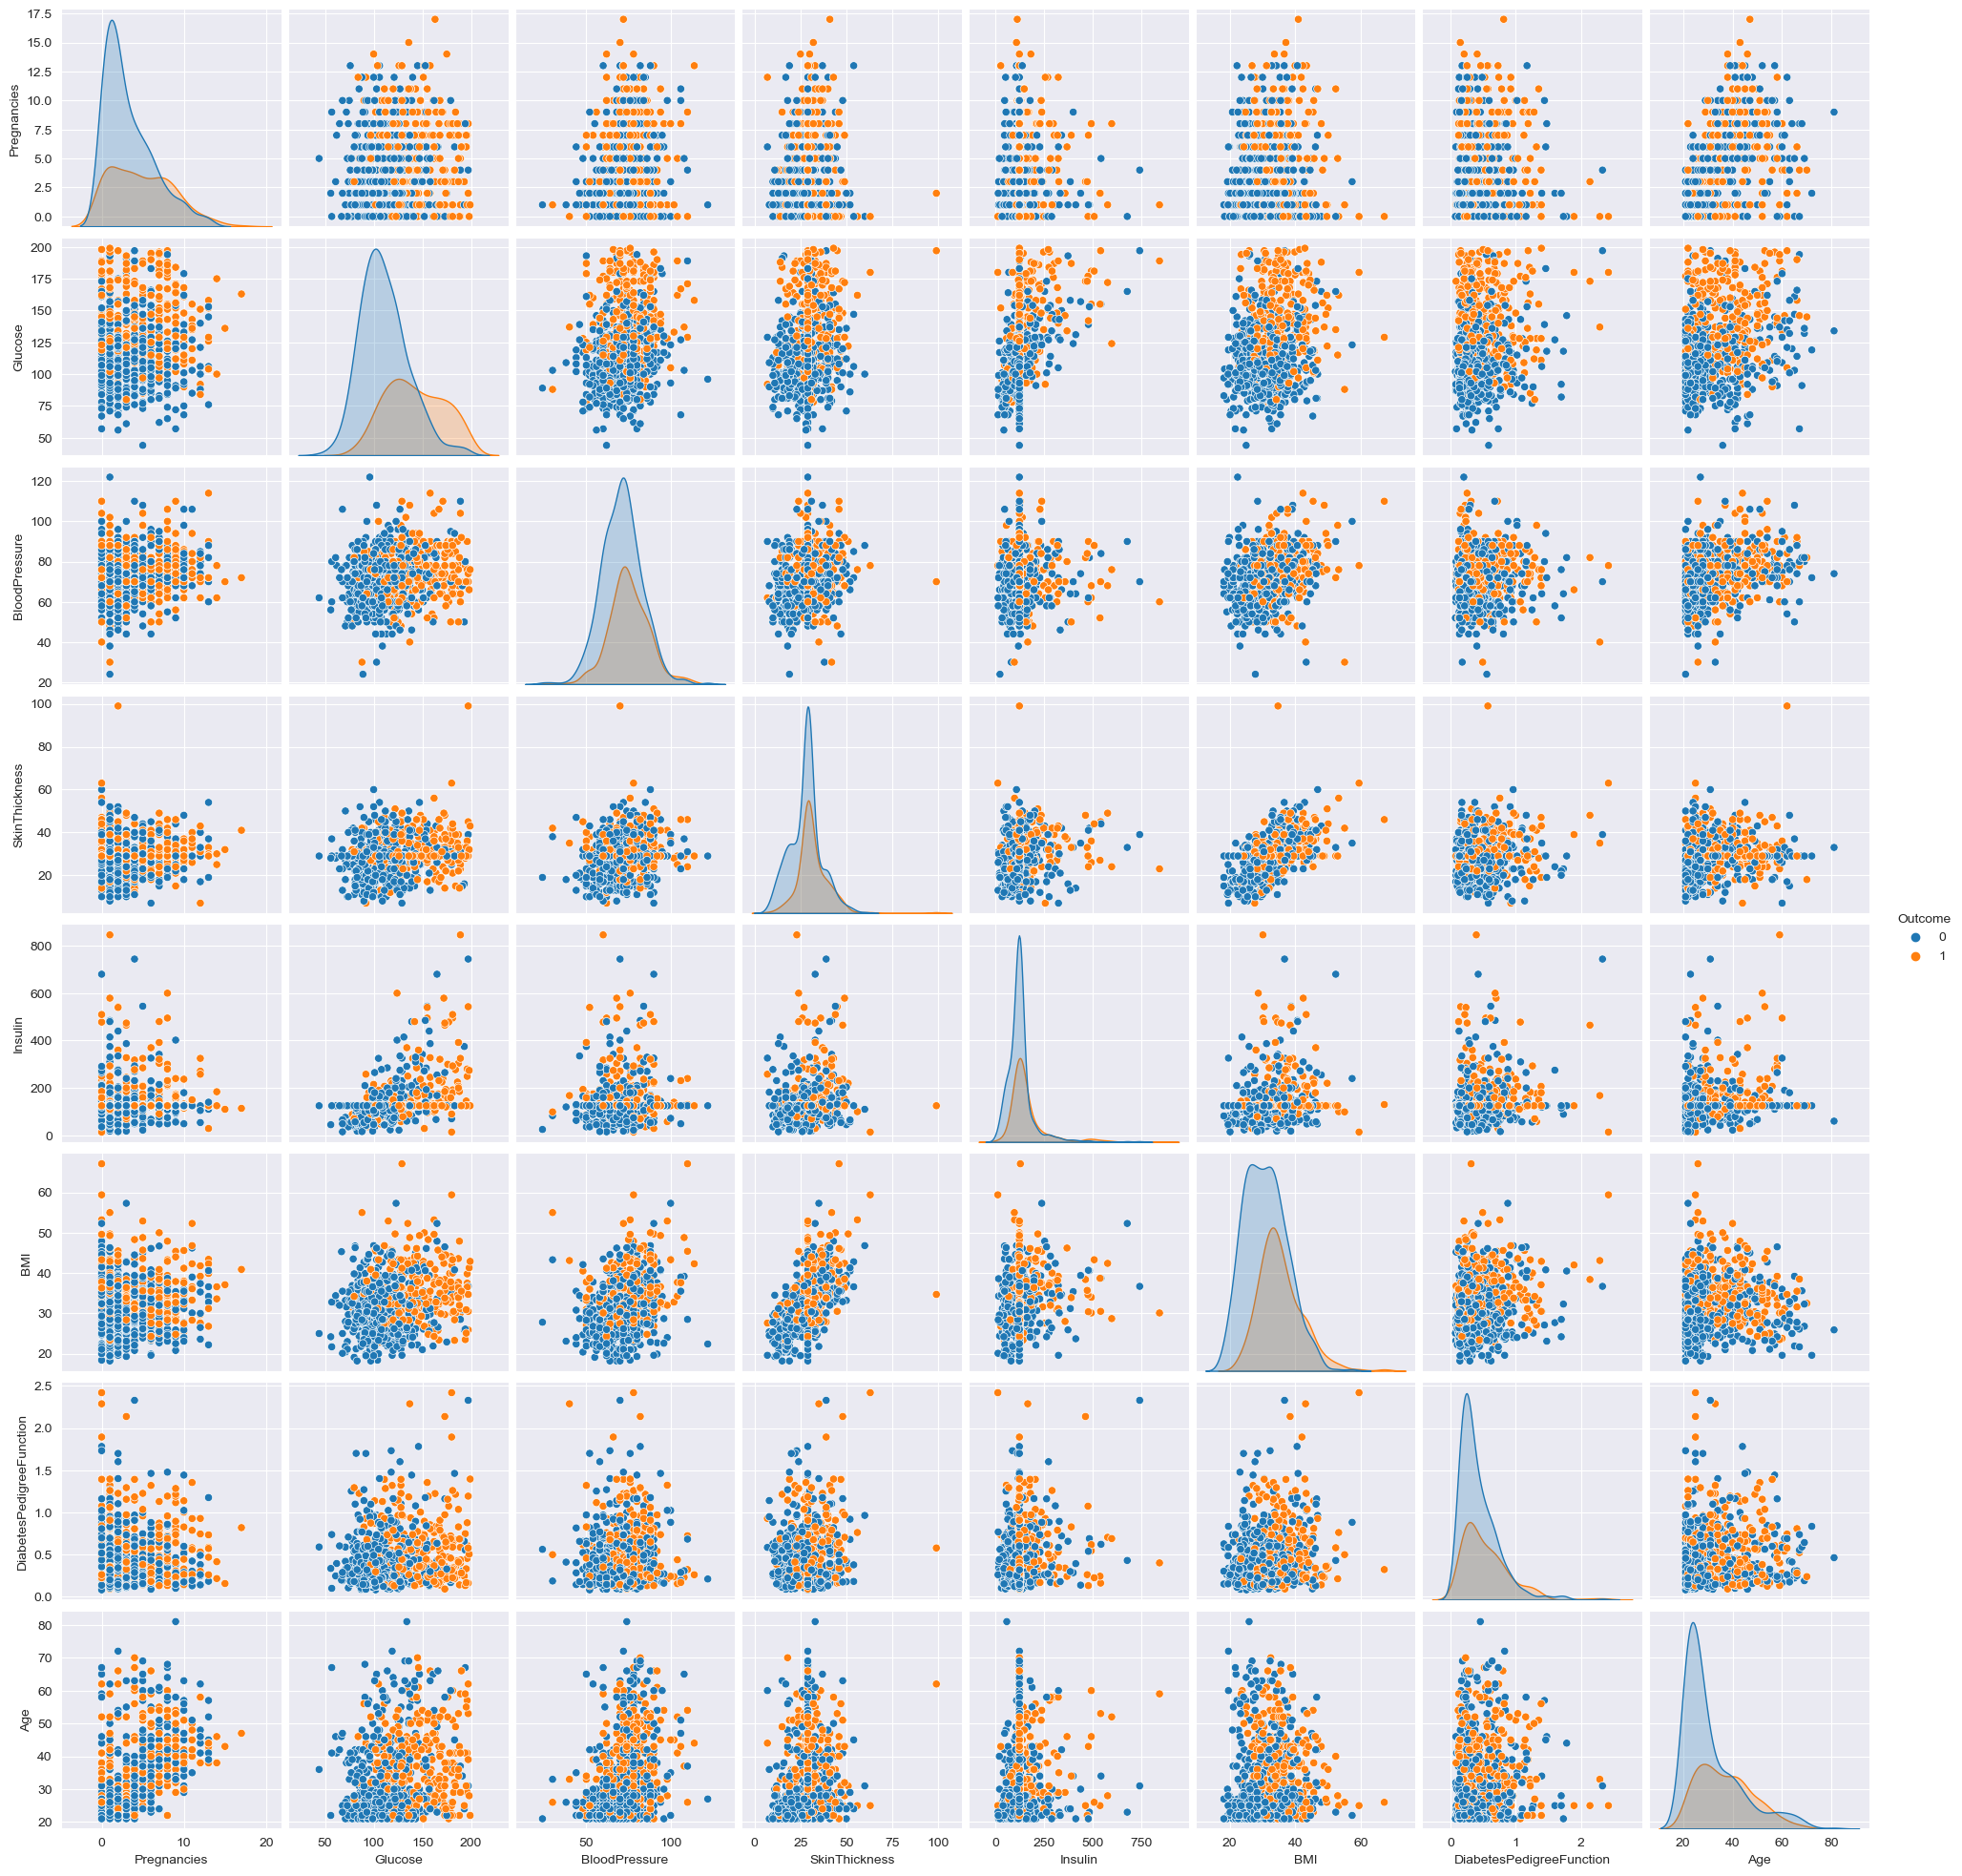

In [14]:
sns.pairplot(df, hue='Outcome')
plt.show()

In [15]:
X = df.drop('Outcome', axis=1)  
y = df['Outcome']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        96
           1       0.67      0.64      0.65        58

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.74      0.75      0.75       154


In [18]:
print("Random Forest Accuracy: ", accuracy_score(y_test, ypred))

Random Forest Accuracy:  0.7467532467532467


In [19]:
import joblib
joblib.dump(rf, 'model.pkl')

['model.pkl']